# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [25]:
# Loop through the list of cities and perform a request for data on each
lat = []
lng = []
temp = []
cloud = []
country = []
date = []
humidity = []
maxtemp = []
wind = []
cityname = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f"finding {city}")
    except KeyError:
        print("Oops, that key doesn't exist.")

Oops, that key doesn't exist.
finding bubaque
finding cape town
finding ushuaia
finding sao mateus
Oops, that key doesn't exist.
finding tupik
finding nicoya
finding saskylakh
Oops, that key doesn't exist.
finding bredasdorp
finding kyabram
finding albany
finding punta arenas
finding lorengau
finding mayor pablo lagerenza
Oops, that key doesn't exist.
finding port elizabeth
finding hobart
finding sai buri
finding kodinsk
finding mataura
finding husavik
Oops, that key doesn't exist.
finding yonago
finding jamestown
finding chuy
finding saint george
finding bluff
finding nome
finding east london
finding puerto madryn
finding lompoc
finding cabo rojo
finding nanortalik
finding laguna
finding tuktoyaktuk
finding hambantota
finding hilo
finding zamosc
finding roald
finding tiznit
finding atuona
finding kuusamo
finding juneau
finding namibe
finding avera
finding qingdao
finding georgetown
finding caravelas
finding kaitangata
finding hualmay
finding udachnyy
finding clyde river
finding kieta


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_data = {'date': date,
                'city': cityname,
                'country': country,
                'lat': lat,
                'lng': lng,
                'temp': temp,
                'maxtemp': maxtemp,
                'humidity': humidity,
                'cloud': cloud,                
                'wind': wind,}

df = pd.DataFrame(weather_data, columns = ['date', 'city', 'country', 'lat', 'lng', 'temp', 'maxtemp', 'humidity', 'cloud', 'wind'])


In [28]:
df

,date,city,country,lat,lng,temp,maxtemp,humidity,cloud,wind
0,1578758306,Bubaque,GW,11.28,-15.83,26.55,26.55,53,33,1.61
1,1578758047,Cape Town,ZA,-33.93,18.42,23.92,25.00,64,0,8.20
2,1578758126,Ushuaia,AR,-54.80,-68.30,11.44,12.00,66,75,12.90
3,1578758306,Sao Mateus,BR,-18.72,-39.86,31.32,31.32,49,29,4.49
4,1578758307,Tupik,RU,54.43,119.93,-23.83,-23.83,89,97,1.74
...,...,...,...,...,...,...,...,...,...,...
547,1578758348,Mortka,RU,59.33,66.02,-10.58,-10.58,94,100,3.37
548,1578758348,Poronaysk,RU,49.22,143.12,-7.81,-7.81,93,100,2.24
549,1578758348,Taraclia,MD,45.90,28.67,5.50,5.50,70,73,4.12
550,1578758348,Koster,ZA,-25.86,26.90,24.20,24.20,57,74,3.21


In [29]:
df.dtypes

date          int64
city         object
country      object
lat         float64
lng         float64
temp        float64
maxtemp     float64
humidity      int64
cloud         int64
wind        float64
dtype: object

In [34]:
df["date"] = pd.to_datetime(pd.Series(df["date"]), unit='s')
df["date"] = pd.to_datetime(pd.Series(df["date"]), format='%m%Y%d')
df['just_date'] = df['date'].dt.date

df.to_csv('weatherdata.csv')



,Unnamed: 0,date,city,country,lat,lng,temp,maxtemp,humidity,cloud,wind,just_date
0,0,2020-01-11 15:58:26,Bubaque,GW,11.28,-15.83,26.55,26.55,53,33,1.61,2020-01-11
1,1,2020-01-11 15:54:07,Cape Town,ZA,-33.93,18.42,23.92,25.00,64,0,8.20,2020-01-11
2,2,2020-01-11 15:55:26,Ushuaia,AR,-54.80,-68.30,11.44,12.00,66,75,12.90,2020-01-11
3,3,2020-01-11 15:58:26,Sao Mateus,BR,-18.72,-39.86,31.32,31.32,49,29,4.49,2020-01-11
4,4,2020-01-11 15:58:27,Tupik,RU,54.43,119.93,-23.83,-23.83,89,97,1.74,2020-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,2020-01-11 15:59:08,Mortka,RU,59.33,66.02,-10.58,-10.58,94,100,3.37,2020-01-11
548,548,2020-01-11 15:59:08,Poronaysk,RU,49.22,143.12,-7.81,-7.81,93,100,2.24,2020-01-11
549,549,2020-01-11 15:59:08,Taraclia,MD,45.90,28.67,5.50,5.50,70,73,4.12,2020-01-11
550,550,2020-01-11 15:59:08,Koster,ZA,-25.86,26.90,24.20,24.20,57,74,3.21,2020-01-11


In [4]:
dfweather = pd.read_csv('weatherdata.csv')
dfweather

,Unnamed: 0,date,city,country,lat,lng,temp,maxtemp,humidity,cloud,wind,just_date
0,0,2020-01-11 15:58:26,Bubaque,GW,11.28,-15.83,26.55,26.55,53,33,1.61,2020-01-11
1,1,2020-01-11 15:54:07,Cape Town,ZA,-33.93,18.42,23.92,25.00,64,0,8.20,2020-01-11
2,2,2020-01-11 15:55:26,Ushuaia,AR,-54.80,-68.30,11.44,12.00,66,75,12.90,2020-01-11
3,3,2020-01-11 15:58:26,Sao Mateus,BR,-18.72,-39.86,31.32,31.32,49,29,4.49,2020-01-11
4,4,2020-01-11 15:58:27,Tupik,RU,54.43,119.93,-23.83,-23.83,89,97,1.74,2020-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,2020-01-11 15:59:08,Mortka,RU,59.33,66.02,-10.58,-10.58,94,100,3.37,2020-01-11
548,548,2020-01-11 15:59:08,Poronaysk,RU,49.22,143.12,-7.81,-7.81,93,100,2.24,2020-01-11
549,549,2020-01-11 15:59:08,Taraclia,MD,45.90,28.67,5.50,5.50,70,73,4.12,2020-01-11
550,550,2020-01-11 15:59:08,Koster,ZA,-25.86,26.90,24.20,24.20,57,74,3.21,2020-01-11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

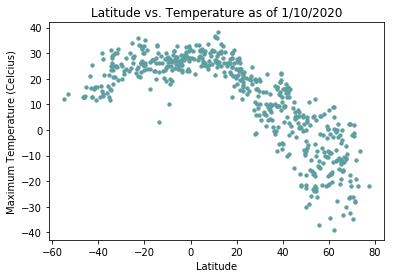

<Figure size 432x288 with 0 Axes>

In [6]:
dfweather.plot.scatter(x='lat', y='maxtemp', c='cadetblue', marker="o", s=11)
plt.title("Latitude vs. Temperature as of 1/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.show()
plt.savefig('images/lat-temp.png')

#### Latitude vs. Humidity Plot

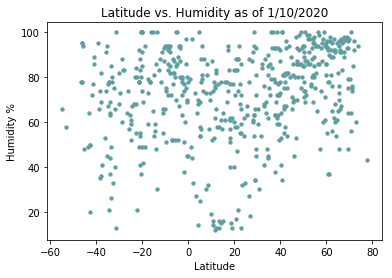

<Figure size 432x288 with 0 Axes>

In [7]:
dfweather.plot.scatter(x='lat', y='humidity', c='cadetblue', marker="o", s=11)
plt.title("Latitude vs. Humidity as of 1/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()
plt.savefig('images/lat-humidity.png')

#### Latitude vs. Cloudiness Plot

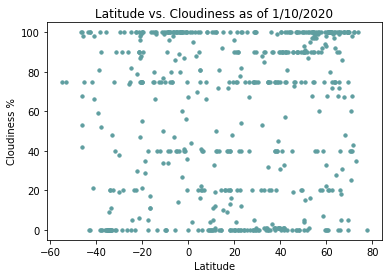

<Figure size 432x288 with 0 Axes>

In [8]:
dfweather.plot.scatter(x='lat', y='cloud', c='cadetblue', marker="o", s=11)
plt.title("Latitude vs. Cloudiness as of 1/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()
plt.savefig('images/lat-clouds.png')

#### Latitude vs. Wind Speed Plot

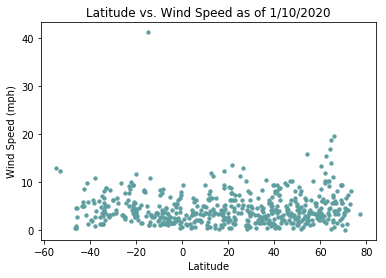

<Figure size 432x288 with 0 Axes>

In [9]:
dfweather.plot.scatter(x='lat', y='wind', c='cadetblue', marker="o", s=11)
plt.title("Latitude vs. Wind Speed as of 1/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig('images/lat-wind.png')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames

dfnorthern = dfweather[dfweather['lat'] >= 0]

dfsouthern = dfweather[dfweather['lat'] < 0]

In [11]:
dfnorthern

,Unnamed: 0,date,city,country,lat,lng,temp,maxtemp,humidity,cloud,wind,just_date
0,0,2020-01-11 15:58:26,Bubaque,GW,11.28,-15.83,26.55,26.55,53,33,1.61,2020-01-11
4,4,2020-01-11 15:58:27,Tupik,RU,54.43,119.93,-23.83,-23.83,89,97,1.74,2020-01-11
5,5,2020-01-11 15:58:27,Nicoya,CR,10.15,-85.45,25.67,31.00,52,0,9.30,2020-01-11
6,6,2020-01-11 15:58:27,Saskylakh,RU,71.92,114.08,-19.26,-19.26,96,100,4.24,2020-01-11
9,9,2020-01-11 15:55:09,Albany,US,42.60,-73.97,13.20,15.56,67,75,6.20,2020-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
546,546,2020-01-11 15:59:08,Patan,NP,27.67,85.33,8.00,8.00,87,20,1.00,2020-01-11
547,547,2020-01-11 15:59:08,Mortka,RU,59.33,66.02,-10.58,-10.58,94,100,3.37,2020-01-11
548,548,2020-01-11 15:59:08,Poronaysk,RU,49.22,143.12,-7.81,-7.81,93,100,2.24,2020-01-11
549,549,2020-01-11 15:59:08,Taraclia,MD,45.90,28.67,5.50,5.50,70,73,4.12,2020-01-11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8613186969754056


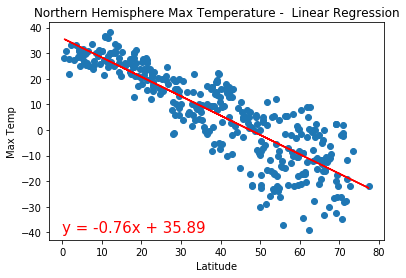

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = dfnorthern['lat']
y_values = dfnorthern['maxtemp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere Max Temperature -  Linear Regression")


# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/north-maxtemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.5282688515036968


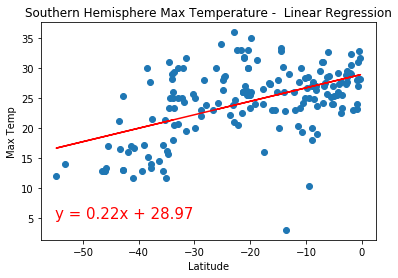

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = dfsouthern['lat']
y_values = dfsouthern['maxtemp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere Max Temperature -  Linear Regression")


# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/south-maxtemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.42441536749248143


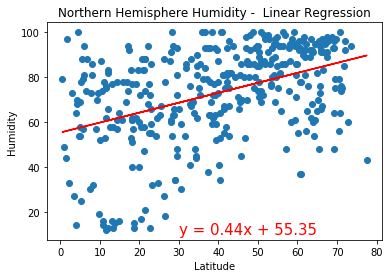

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = dfnorthern['lat']
y_values = dfnorthern['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Humidity -  Linear Regression")


# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/north-humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.21533503516777072


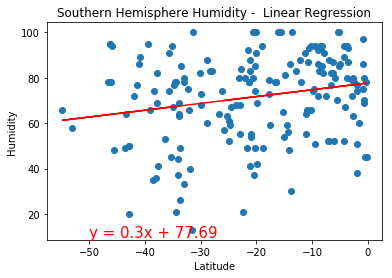

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = dfsouthern['lat']
y_values = dfsouthern['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Humidity -  Linear Regression")


# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/south-humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.25610850096800697


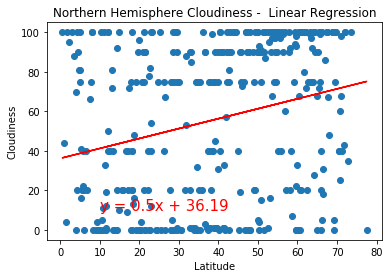

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = dfnorthern['lat']
y_values = dfnorthern['cloud']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness -  Linear Regression")
# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/north-clouds.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.24226215150906327


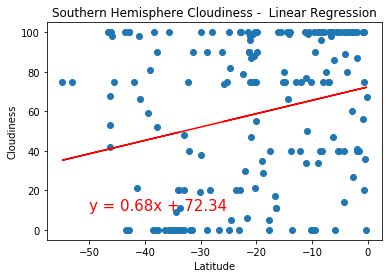

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = dfsouthern['lat']
y_values = dfsouthern['cloud']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness -  Linear Regression")
# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/south-clouds.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.1519310942182751


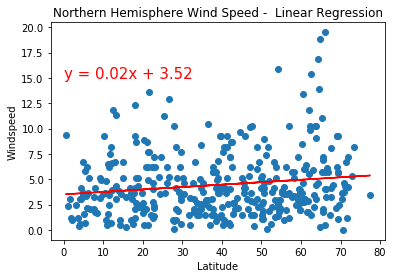

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = dfnorthern['lat']
y_values = dfnorthern['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Northern Hemisphere Wind Speed -  Linear Regression")
# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/north-wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.13277971619789913


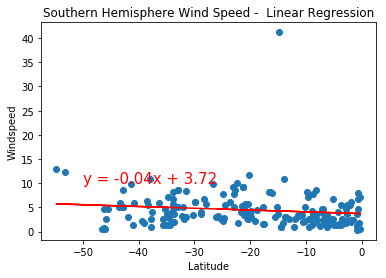

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = dfsouthern['lat']
y_values = dfsouthern['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Southern Hemisphere Wind Speed -  Linear Regression")
# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('images/south-wind.png')

## Observations
1. Max temp increases as latitutde heads to 0. Both the northern and southern max temp charts show increase in temprature as you head to 0 latitude.
2. There is a very slight decrease in wind speed closer to the equator, but it is not a significant change. You can see that the slope is only -.04 for Southern Hemisphere with an R value of -.133, and a 0.02 slope with R value of .152 for Northern Hemisphere.
3. Humidity increases as latitutde increases. Both Northern and Southern hemisphere have a positive slope for this one.